# Homework:

1. Figure out what's wrong with our least squares solution!
2. Rewrite the above code to give the correct answer.
3. Rewrite the above code to estimate the vector $\beta$ for a $3$ dimensional normal random variable.
3. Write a function which takes an arbitrarily large vector of means, a correlation matrix, and a sample size, and outputs the estimated vector $\beta$ and plots the sample with the least squares line (note: plotting this is going to be tricky for more than 3 dimensions, so don't worry about it).
4. Take a break, because you've probably had enough of me and need to submit your semester project ideas!

1. Figure out what's wrong with our least squares solution!

The least squares solution we calculated excluded an intercept, or forced it to be zero. We can fix this by adding a column of ones to our **experiment** matrix, $X$. This will allow there to be another entry of $\beta$ such that $y \approx \beta_0 + x \beta_1$.

In [1]:
# 2. Rewrite the above code to give the correct answer.

# Load the package
# NOTE: Uncomment this line if need to install package
#install.packages("MASS", repos="http://cran.rstudio.com/")
require(MASS)

# Set the correlation parameter and mean
beta = 0.5
SIGMA = matrix(c(1,beta,beta,1), ncol=2)
MU = c(2.0, 1.0)

# Set the sample size
N = 50

# Draw your sample
out <- mvrnorm(N, mu = MU, Sigma = SIGMA)


Loading required package: MASS


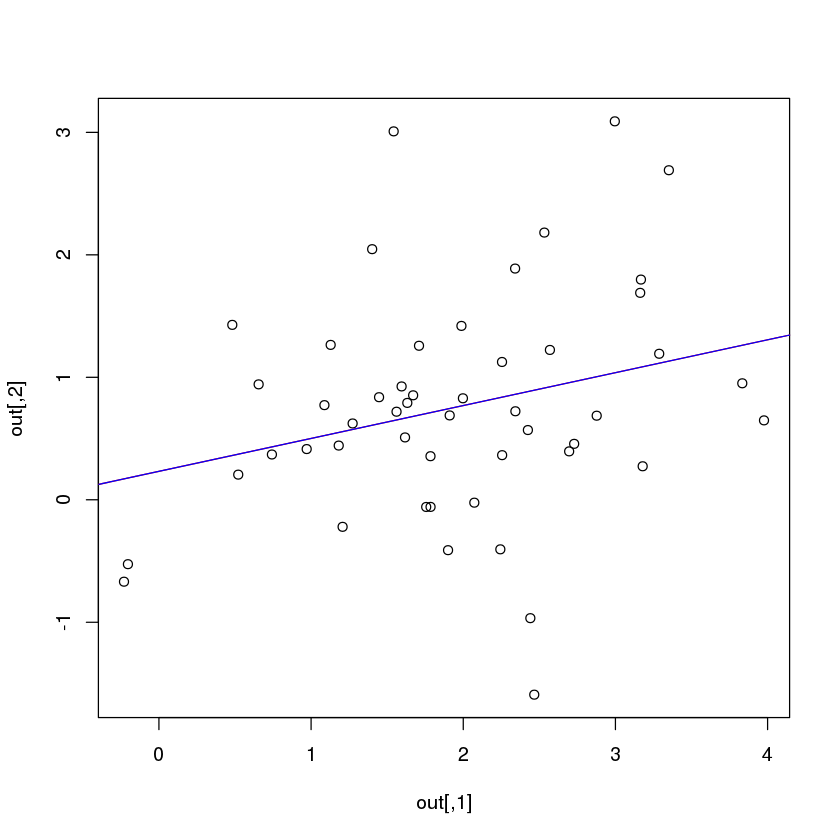

In [2]:
# Our data set is named `out`, which we split into y and X
y <- out[, 2]
X <- cbind(rep(1, N), out[, 1])

# Now carry out intermediate calculations
XT = t(X)
XTX = XT%*%X
invXTX = solve(XTX)
XTy = XT%*%y
beta = invXTX %*% XTy

# Now add this line to the plot
plot(out)
abline(lm(out[,2]~out[,1]), col="red") # regression line (y~x) 
abline(a=beta[1], b=beta[2], col="blue")

In [5]:
# Rewrite the above code to estimate the vector $\beta$ 
# for a $3$ dimensional normal random variable.
# 2. Rewrite the above code to give the correct answer.


# Set the correlation parameter and mean
s1 <- 0.8
s2 <- 0.6
s3 <- 0.3
SIGMA = matrix(c(1,s1, s2,
                 s1, 1, s3,
                 s2, s3, 1), ncol=3)
SIGMA
MU = c(2.0, 1.0, 3.8)

# Set the sample size
N = 50

# Draw your sample
out <- mvrnorm(N, mu = MU, Sigma = SIGMA)

1.0,0.8,0.6
0.8,1.0,0.3
0.6,0.3,1.0


In [6]:
# Our data set is named `out`, which we split into y and X
y <- out[, 3]
X <- cbind(rep(1, N), out[, 1], out[, 2])

# Now carry out intermediate calculations
XT = t(X)
XTX = XT%*%X
invXTX = solve(XTX)
XTy = XT%*%y
beta = invXTX %*% XTy

# Compare our answer to lm
lm(out[,3]~out[,1] + out[,2])
beta


Call:
lm(formula = out[, 3] ~ out[, 1] + out[, 2])

Coefficients:
(Intercept)     out[, 1]     out[, 2]  
     2.3964       0.8554      -0.3814  


2.396413
0.8553901
-0.381378


In [7]:
# Write a function which takes an arbitrarily large vector of
# means, a correlation matrix, and a sample size, and outputs
# the estimated vector $\beta$ and plots the sample with the
# least squares line (note: plotting this is going to be 
# tricky for more than 3 dimensions, so don't worry about it).
# Rewrite the above code to estimate the vector $\beta$ 
# for a $3$ dimensional normal random variable.
# 2. Rewrite the above code to give the correct answer.


# Set the correlation parameter and mean
s1 <- 0.8
s2 <- 0.6
s3 <- 0.3
SIGMA = matrix(c(1,s1, s2,
                 s1, 1, s3,
                 s2, s3, 1), ncol=3)
SIGMA
MU = c(2.0, 1.0, 3.8)

# Set the sample size
N = 50

regression_beta <- function(MU, SIGMA, N){
    # Draw your sample
    out <- mvrnorm(N, mu = MU, Sigma = SIGMA)

    # Our data set is named `out`, which we split into y and X
    y <- out[, 3]
    X <- cbind(rep(1, N), out[, 1], out[, 2])

    # Now carry out intermediate calculations
    XT = t(X)
    XTX = XT%*%X
    invXTX = solve(XTX)
    XTy = XT%*%y
    return(invXTX %*% XTy)
}
regression_beta(MU, SIGMA, N)

1.0,0.8,0.6
0.8,1.0,0.3
0.6,0.3,1.0


2.338355
1.060564
-0.6045396
